## Importing Necessary Libraries

In [29]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats
%matplotlib inline

## Data Upload

In [3]:
train_data = pd.read_csv("train.csv")
df_train = train_data.copy()
test_data = pd.read_csv("test.csv")
df_test = test_data.copy()
#train_data.head()
#test_data.head()

In [4]:
print(df_train.shape, df_test.shape)

(1460, 81) (1459, 80)


In [16]:
print(tabulate(df_train.describe().T,headers=df_train.describe().T.columns,tablefmt="psql"))

+---------------+---------+----------------+--------------+-------+-----------+----------+-----------+--------+
|               |   count |           mean |          std |   min |       25% |      50% |       75% |    max |
|---------------+---------+----------------+--------------+-------+-----------+----------+-----------+--------|
| Id            |    1460 |    730.5       |   421.61     |     1 |    365.75 |    730.5 |   1095.25 |   1460 |
| MSSubClass    |    1460 |     56.8973    |    42.3006   |    20 |     20    |     50   |     70    |    190 |
| LotFrontage   |    1201 |     70.05      |    24.2848   |    21 |     59    |     69   |     80    |    313 |
| LotArea       |    1460 |  10516.8       |  9981.26     |  1300 |   7553.5  |   9478.5 |  11601.5  | 215245 |
| OverallQual   |    1460 |      6.09932   |     1.383    |     1 |      5    |      6   |      7    |     10 |
| OverallCond   |    1460 |      5.57534   |     1.1128   |     1 |      5    |      5   |      6    |  

In [23]:
pd.DataFrame(df_train.dtypes,columns=['Type']).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Type,int64,int64,category,float64,int64,category,category,category,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64


### Data Type Conversion for Categorical Variables

In [35]:
df_train['MSZoning'] = df_train['MSZoning'].astype(CategoricalDtype())
df_train['Street'] = df_train['Street'].astype(CategoricalDtype())
df_train['Alley'] = df_train['Alley'].astype(CategoricalDtype())
df_train['LotShape'] = df_train['LotShape'].astype(CategoricalDtype())
df_train['OverallQual'] = df_train['OverallQual'].astype(CategoricalDtype())
df_train['OverallCond'] = df_train['OverallCond'].astype(CategoricalDtype())

df_test['MSZoning'] = df_test['MSZoning'].astype(CategoricalDtype())
df_test['Street'] = df_test['Street'].astype(CategoricalDtype())
df_test['Alley'] = df_test['Alley'].astype(CategoricalDtype())
df_test['LotShape'] = df_test['LotShape'].astype(CategoricalDtype())
df_test['OverallQual'] = df_test['OverallQual'].astype(CategoricalDtype())
df_test['OverallCond'] = df_test['OverallCond'].astype(CategoricalDtype())

In [28]:
df_train['MSZoning'].unique()

[RL, RM, C (all), FV, RH]
Categories (5, object): [RL, RM, C (all), FV, RH]

## Visualizations to Explore the Data

mu=180921.19589041095, sigma=79415.29188606751


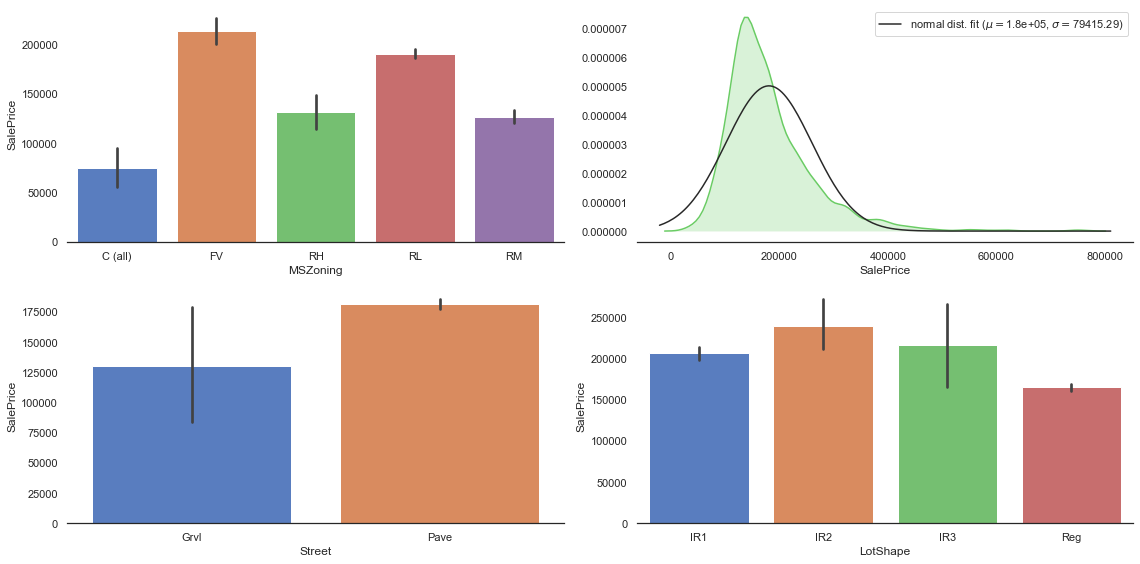

In [34]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='MSZoning',y='SalePrice',data=df_train, ax=axes[0, 0]);
# Plot a filled kernel density estimate
sns.distplot(df_train['SalePrice'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0, 1],
            fit=stats.norm);
#Gaussian Fit for Price Distribution
(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
print("mu={0}, sigma={1}".format(mu, sigma))
axes[0,1].legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)],loc="upper right")
# Plot a filled kernel density estimate
#sns.distplot(df_train['Street'], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1, 0]);
sns.barplot(x='Street',y='SalePrice',data=df_train, ax=axes[1, 0]);
sns.barplot(x='LotShape',y='SalePrice',data=df_train, ax=axes[1, 1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

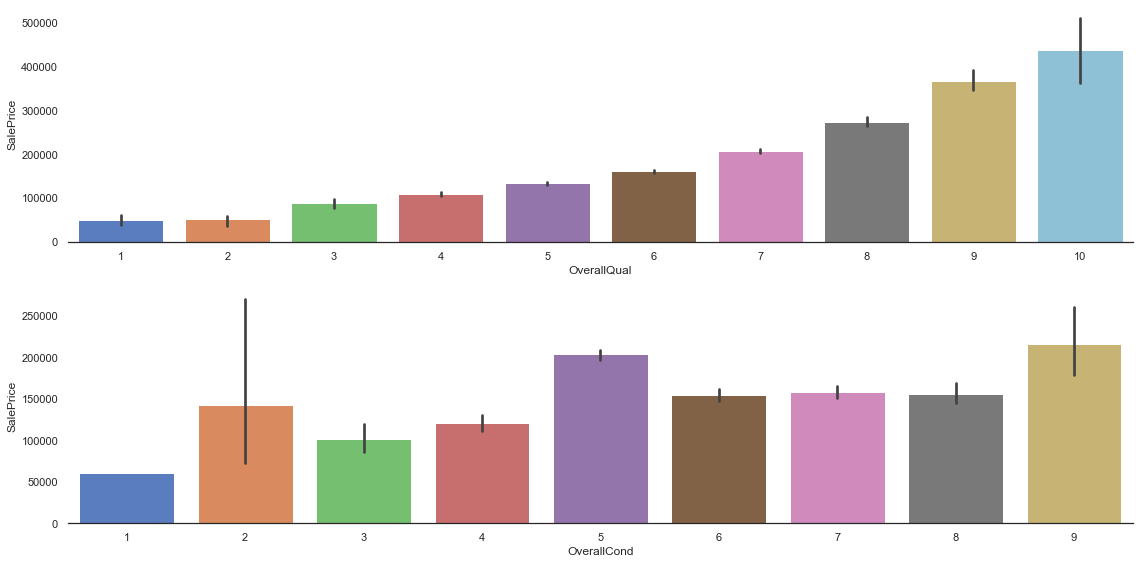

In [37]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='OverallQual',y='SalePrice',data=df_train, ax=axes[0]);
# Plot a filled kernel density estimate
sns.barplot(x='OverallCond',y='SalePrice',data=df_train, ax=axes[1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()